**Objective:**

The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets

**Tasks:**
* Analyse the data using the visualizations
* Preprocess the data by handling missing values & Outliers, if any.
* Split the dataset into training and testing sets (80% training, 20% testing).
* Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
* Choose an appropriate distance metric and value for K.
* Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
* Visualize the decision boundaries of the classifier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
# Loading the dataset
zoo_data = pd.read_csv('/content/Zoo.csv')
zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
# Infomation about the dataset
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
# Verify no missing data in all columns
zoo_data.isna().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [5]:
# Check for duplicates
zoo_data[zoo_data.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


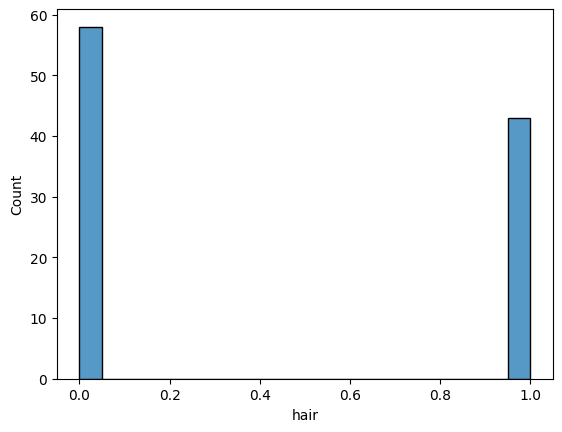

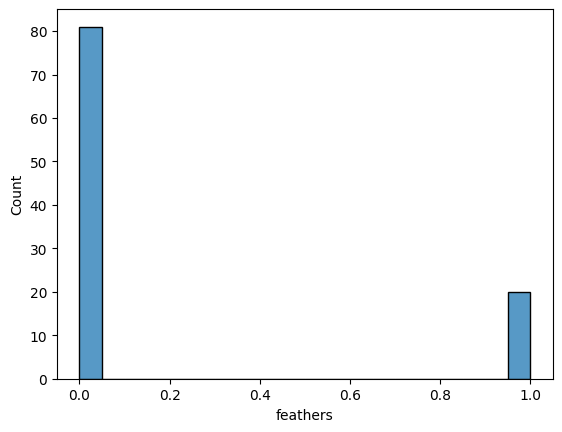

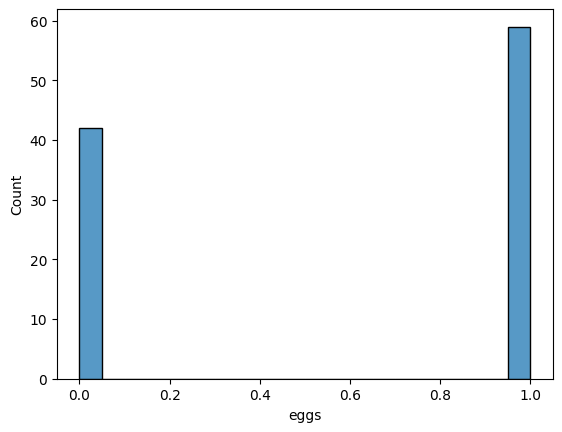

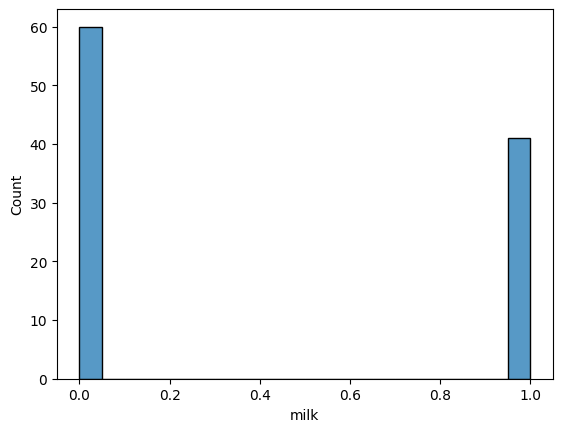

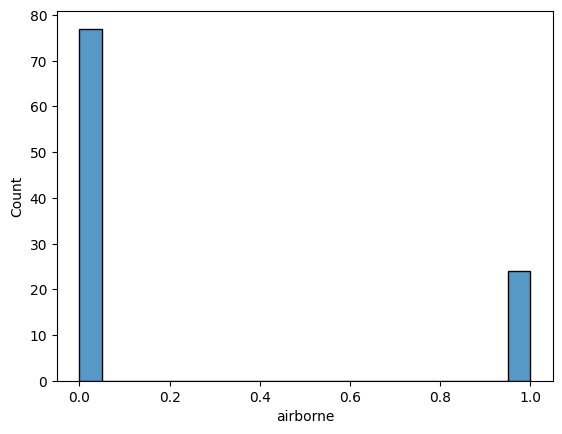

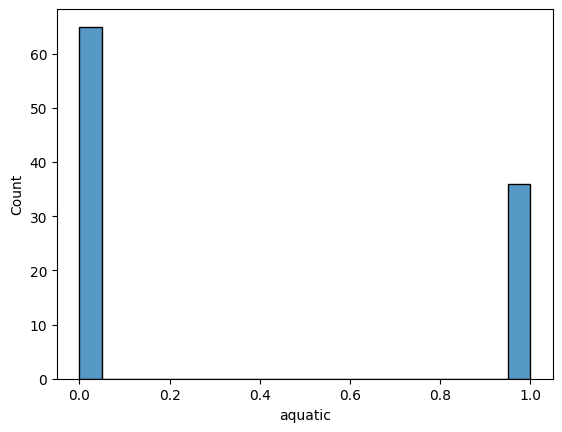

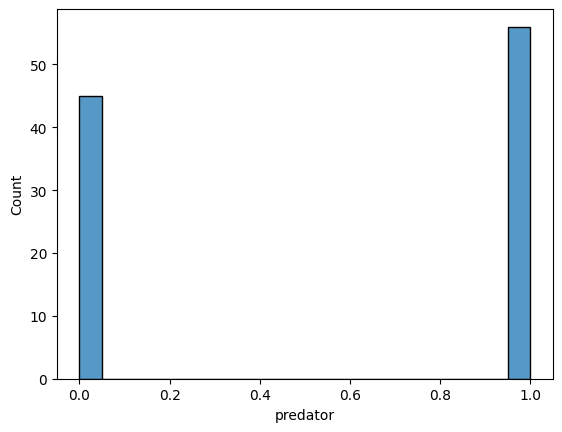

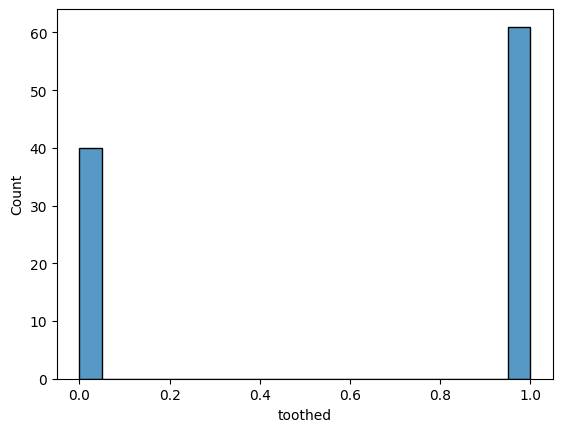

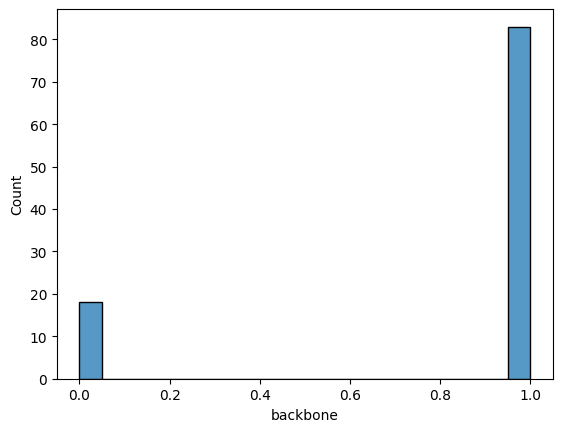

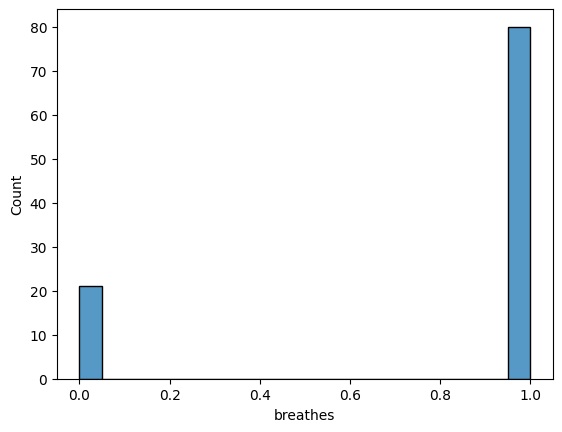

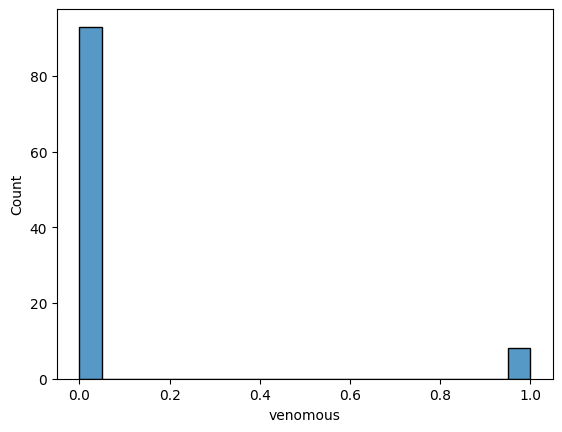

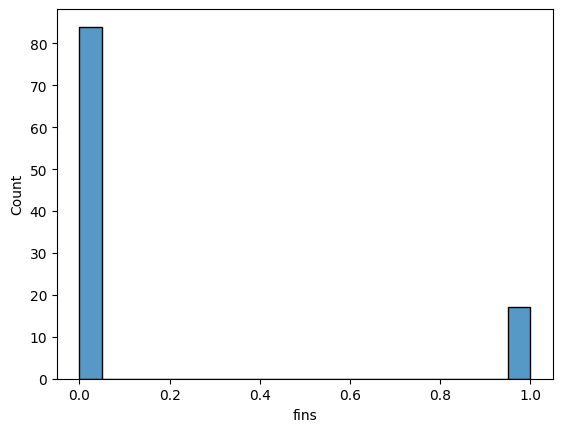

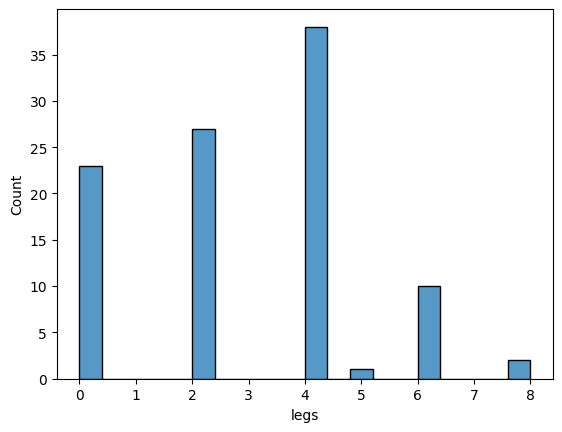

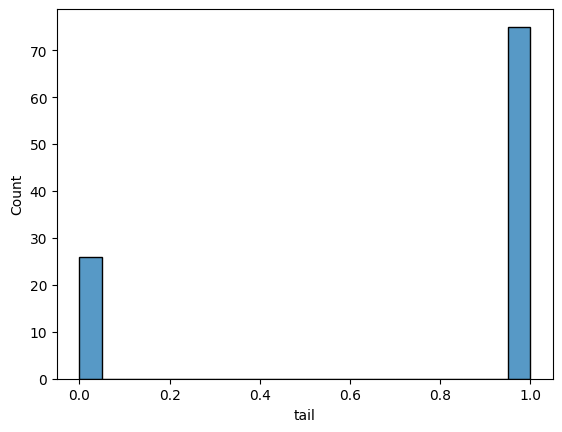

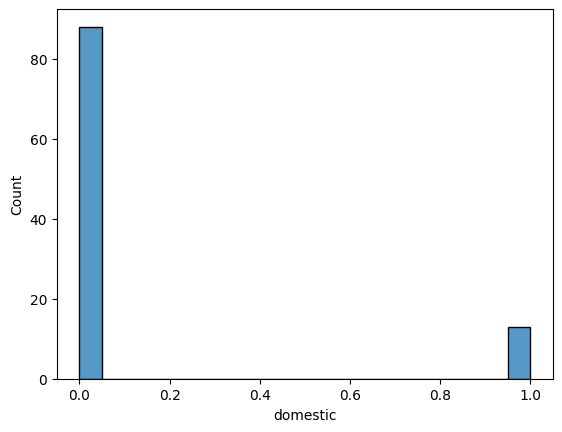

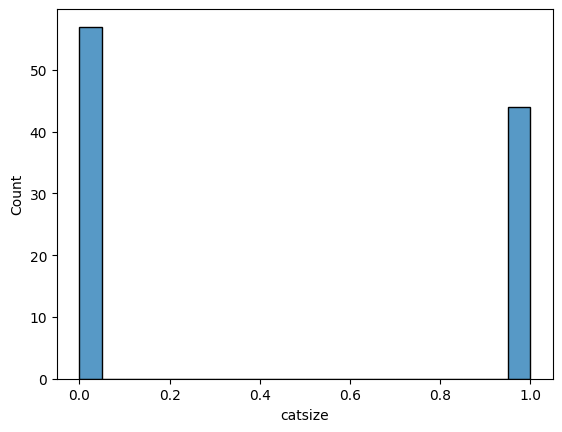

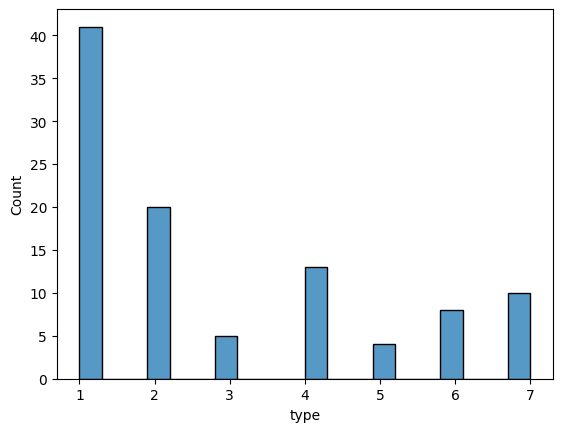

In [6]:
for col in zoo_data.columns:
  if col != 'animal name':
    sea.histplot(zoo_data[col], bins = 20)
    plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
zoo_data['animal name'] = le.fit_transform(zoo_data['animal name'])
zoo_data['animal name'].head(10)

,animal name
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
# Spliting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(zoo_data.drop(['animal name', 'type'], axis = 1), zoo_data['type'], test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(80, 16) (21, 16) (80,) (21,)


In [11]:
# Initialize with 3 neighbours and euclidean distance
knn01 = KNeighborsClassifier(n_neighbors = 3)
# Train the model with training dataset
knn01.fit(x_train, y_train)
# Make predictions and evaluate
y_pred01 = knn01.predict(x_test)
print(y_pred01)

[1 1 1 1 1 6 1 1 1 1 4 6 6 2 7 1 1 2 4 1 4]


In [12]:
# Metrics
print(confusion_matrix(y_test, y_pred01))

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


In [13]:
print('Accuracy:', round(accuracy_score(y_test, y_pred01), 4))
print('Precision:', round(precision_score(y_test, y_pred01, average = 'macro'), 4))
print('Recall:', round(recall_score(y_test, y_pred01, average = 'macro'), 4))
print('F1 Score:', round(f1_score(y_test, y_pred01, average = 'macro'), 4))

Accuracy: 0.9524
Precision: 0.7778
Recall: 0.8333
F1 Score: 0.8


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# 5 neighbours
knn02 = KNeighborsClassifier(n_neighbors = 5)
knn02.fit(x_train, y_train)
y_pred02 = knn02.predict(x_test)
print(confusion_matrix(y_test, y_pred02))
print('Accuracy:', round(accuracy_score(y_test, y_pred02), 4))
print('Precision:', round(precision_score(y_test, y_pred02, average = 'macro'), 4))
print('Recall:', round(recall_score(y_test, y_pred02, average = 'macro'), 4))
print('F1 Score:', round(f1_score(y_test, y_pred02, average = 'macro'), 4))

[[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
Accuracy: 0.9048
Precision: 0.75
Recall: 0.8194
F1 Score: 0.7705


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# 7 neighbours
knn03 = KNeighborsClassifier(n_neighbors = 7)
knn03.fit(x_train, y_train)
y_pred03 = knn03.predict(x_test)
print(confusion_matrix(y_test, y_pred03))
print('Accuracy:', round(accuracy_score(y_test, y_pred03), 4))
print('Precision:', round(precision_score(y_test, y_pred03, average = 'macro'), 4))
print('Recall:', round(recall_score(y_test, y_pred03, average = 'macro'), 4))
print('F1 Score:', round(f1_score(y_test, y_pred03, average = 'macro'), 4))

[[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  0]]
Accuracy: 0.8571
Precision: 0.5667
Recall: 0.6528
F1 Score: 0.588


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Three models with increasing number of neighbours show that the model performance reduces as a function of neighbours.

In [16]:
# Find the optimal K value and the number of wrong predictions
accuracy_score_list = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred_i)
    accuracy_score_list.append(accuracy)

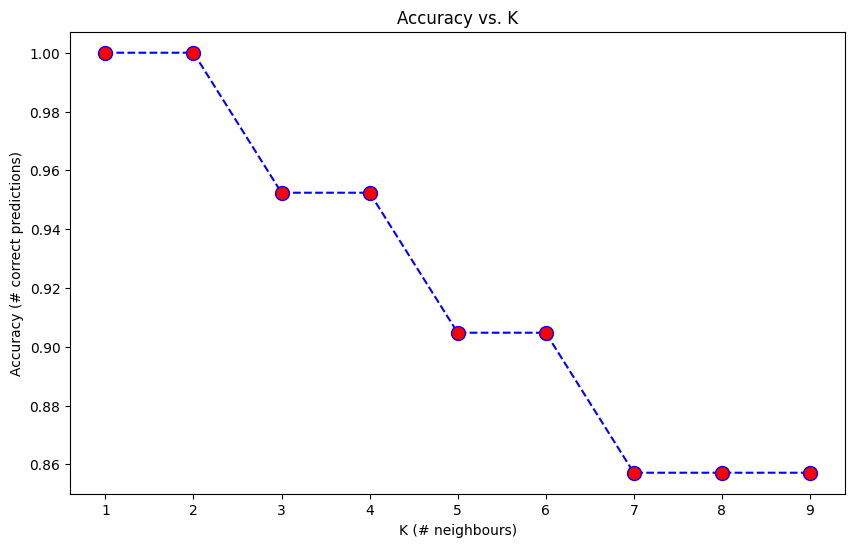

In [17]:
# Visualize model performace (accuracy) as function of #neighbours
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), accuracy_score_list, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K')
plt.xlabel('K (# neighbours)')
plt.ylabel('Accuracy (# correct predictions)')
plt.show()

In [18]:
# Initializing with # neignbours and Hamming distance (As most data is binary or Lable encoded)
knn04 = KNeighborsClassifier(n_neighbors = 1, metric = 'hamming')
knn04.fit(x_train, y_train)
y_pred04 = knn04.predict(x_test)
print(confusion_matrix(y_test, y_pred04))
print('Accuracy:', round(accuracy_score(y_test, y_pred04), 4))
print('Precision:', round(precision_score(y_test, y_pred04, average = 'macro'), 4))
print('Recall:', round(recall_score(y_test, y_pred04, average = 'macro'), 4))
print('F1 Score:', round(f1_score(y_test, y_pred04, average = 'macro'), 4))

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [19]:
# 3 neighbours
knn05 = KNeighborsClassifier(n_neighbors = 3, metric = 'hamming')
knn05.fit(x_train, y_train)
y_pred05 = knn05.predict(x_test)
print(confusion_matrix(y_test, y_pred05))
print('Accuracy:', round(accuracy_score(y_test, y_pred05), 4))
print('Precision:', round(precision_score(y_test, y_pred05, average = 'macro'), 4))
print('Recall:', round(recall_score(y_test, y_pred05, average = 'macro'), 4))
print('F1 Score:', round(f1_score(y_test, y_pred05, average = 'macro'), 4))

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
Accuracy: 0.9524
Precision: 0.7778
Recall: 0.8333
F1 Score: 0.8


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
# 5 neighbours
knn06 = KNeighborsClassifier(n_neighbors = 5, metric = 'hamming')
knn06.fit(x_train, y_train)
y_pred06 = knn06.predict(x_test)
print(confusion_matrix(y_test, y_pred06))
print('Accuracy:', round(accuracy_score(y_test, y_pred06), 4))
print('Precision:', round(precision_score(y_test, y_pred06, average = 'macro'), 4))
print('Recall:', round(recall_score(y_test, y_pred06, average = 'macro'), 4))
print('F1 Score:', round(f1_score(y_test, y_pred06, average = 'macro'), 4))

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
Accuracy: 0.9524
Precision: 0.7778
Recall: 0.8333
F1 Score: 0.8


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# 7 neighbours
knn07 = KNeighborsClassifier(n_neighbors = 7, metric = 'hamming')
knn07.fit(x_train, y_train)
y_pred07 = knn07.predict(x_test)
print(confusion_matrix(y_test, y_pred07))
print('Accuracy:', round(accuracy_score(y_test, y_pred07), 4))
print('Precision:', round(precision_score(y_test, y_pred07, average = 'macro'), 4))
print('Recall:', round(recall_score(y_test, y_pred07, average = 'macro'), 4))
print('F1 Score:', round(f1_score(y_test, y_pred07, average = 'macro'), 4))

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
Accuracy: 0.9524
Precision: 0.7778
Recall: 0.8333
F1 Score: 0.8


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Based on the key metrics of different models with varying number of neighbours, model performance is not affected by the number of neighbours except for 1-neighbor model.

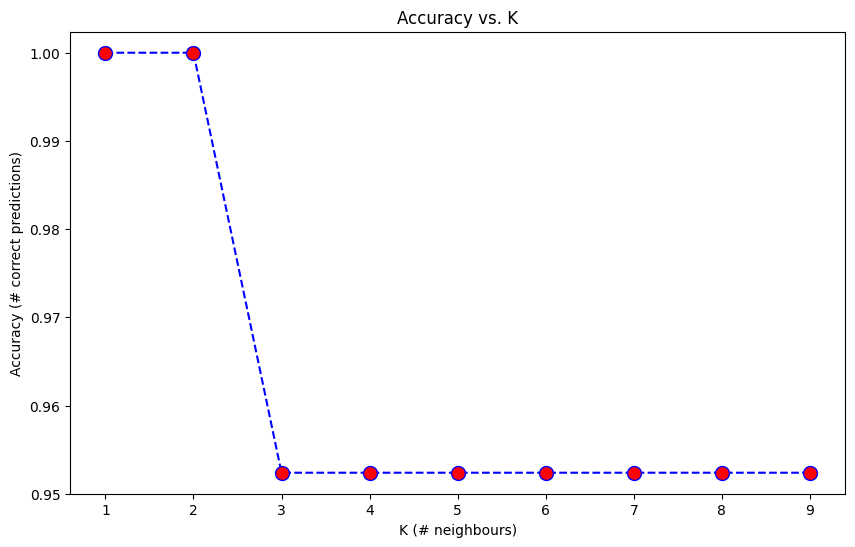

In [22]:
accuracy_score_list = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'hamming')
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred_i)
    accuracy_score_list.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), accuracy_score_list, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K')
plt.xlabel('K (# neighbours)')
plt.ylabel('Accuracy (# correct predictions)')
plt.show()

In [23]:
from sklearn.inspection import permutation_importance
from mlxtend.plotting import plot_decision_regions

In [24]:
result01 = permutation_importance(knn01, x_test, y_test, n_repeats = 10, random_state = 42)
important_idx = result01.importances_mean.argsort()[-2:]
important_features = x_train.iloc[:, important_idx]
print('two most important features are', important_features)

two most important features are     tail  legs
89     0     4
26     0     4
42     0     6
70     1     4
15     0     6
..   ...   ...
60     1     0
71     1     2
14     0     4
92     1     0
51     0     6

[80 rows x 2 columns]


In [25]:
knn01_important = KNeighborsClassifier(n_neighbors = 3)
knn01_important.fit(x_train[important_features.columns], y_train)

KNeighborsClassifier(n_neighbors=3)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


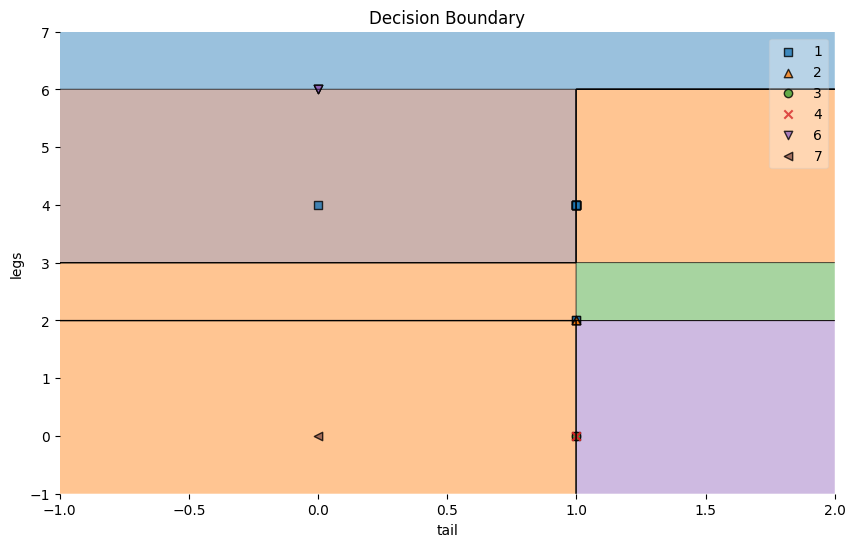

In [26]:
plt.figure(figsize = (10, 6))
plot_decision_regions(x_test[important_features.columns].values, y_test.values, clf = knn01_important, )
plt.xlabel('{}'.format(important_features.columns[0]))
plt.ylabel('{}'.format(important_features.columns[1]))
plt.title('Decision Boundary')
plt.show()

In [27]:
result02 = permutation_importance(knn02, x_test, y_test, n_repeats = 10, random_state = 42)
important_idx = result02.importances_mean.argsort()[-2:]
important_features = x_train.iloc[:, important_idx]
print('two most important features are', important_features)

two most important features are     toothed  legs
89        1     4
26        1     4
42        0     6
70        1     4
15        0     6
..      ...   ...
60        1     0
71        0     2
14        0     4
92        1     0
51        0     6

[80 rows x 2 columns]


In [28]:
knn02_important = KNeighborsClassifier(n_neighbors = 5)
knn02_important.fit(x_train[important_features.columns], y_train)

KNeighborsClassifier()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


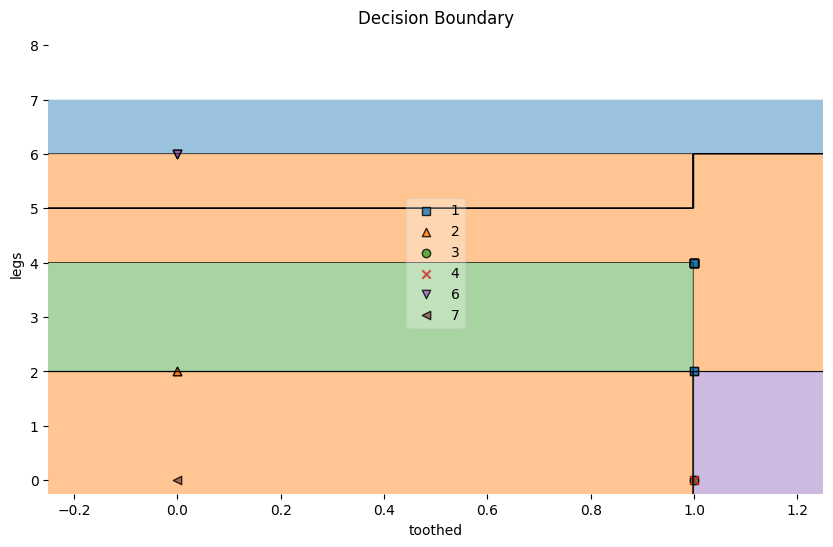

In [33]:
plt.figure(figsize = (10, 6))
plot_decision_regions(x_test[important_features.columns].values, y_test.values, clf = knn02_important, legend = 10)
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 8.25)
plt.xlabel('{}'.format(important_features.columns[0]))
plt.ylabel('{}'.format(important_features.columns[1]))
plt.title('Decision Boundary')
plt.show()

This is a decision boundary plot of 5 neighbours. 'toother' is a binary feature and hence the markers are seen in two vertical bands, 'legs' is a numerical feature between (0 to 8). This creates clean reactagles (6) for 7 classes ('type' feature). Each rectangle is associated with one 'type' indicating that voting happens over multiple nearby datapoints along 'legs' axis. This plot is a simple 2D representation of a 14 dimension dataset, the data not visible in this plot are in other complex dimensions.

In [34]:
# neighbours = 5, metric = 'hamming'
result03 = permutation_importance(knn06, x_test, y_test, n_repeats = 10, random_state = 42)
important_idx = result03.importances_mean.argsort()[-2:]
important_features = x_train.iloc[:, important_idx]
print('two most important features are', important_features)

two most important features are     milk  catsize
89     0        0
26     0        0
42     0        0
70     1        1
15     0        0
..   ...      ...
60     0        1
71     0        1
14     0        0
92     0        1
51     0        0

[80 rows x 2 columns]


In [35]:
# Training with 'important' features (2)
knn06_important = KNeighborsClassifier(n_neighbors = 5, metric = 'hamming')
knn06_important.fit(x_train[important_features.columns], y_train)

KNeighborsClassifier(metric='hamming')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


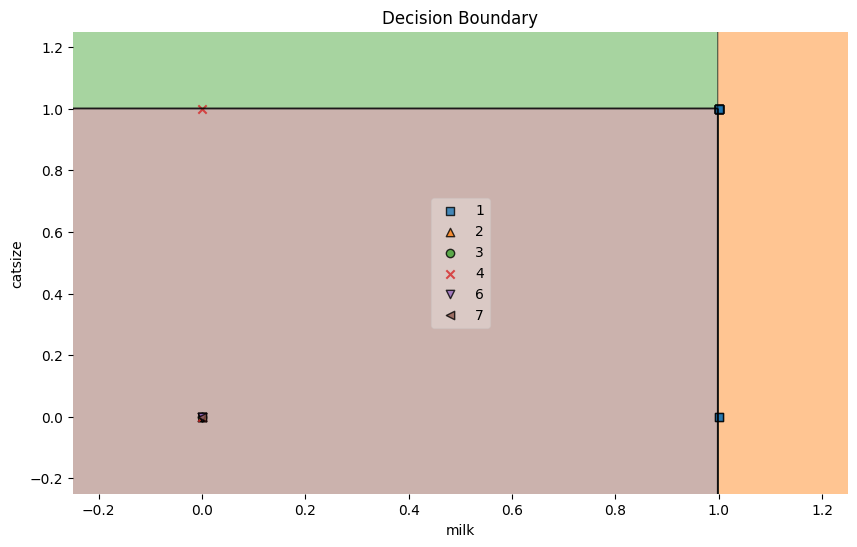

In [37]:
plt.figure(figsize = (10, 6))
plot_decision_regions(x_test[important_features.columns].values, y_test.values, clf = knn06_important, legend = 10)
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.xlabel('{}'.format(important_features.columns[0]))
plt.ylabel('{}'.format(important_features.columns[1]))
plt.title('Decision Boundary')
plt.show()

In [38]:
# neighbours = 7, metric = 'hamming'
result04 = permutation_importance(knn07, x_test, y_test, n_repeats = 10, random_state = 42)
important_idx = result04.importances_mean.argsort()[-2:]
important_features = x_train.iloc[:, important_idx]
print('two most important features are', important_features)

two most important features are     milk  catsize
89     0        0
26     0        0
42     0        0
70     1        1
15     0        0
..   ...      ...
60     0        1
71     0        1
14     0        0
92     0        1
51     0        0

[80 rows x 2 columns]


In [39]:
knn07_important = KNeighborsClassifier(n_neighbors = 7, metric = 'hamming')
knn07_important.fit(x_train[important_features.columns], y_train)

KNeighborsClassifier(metric='hamming', n_neighbors=7)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


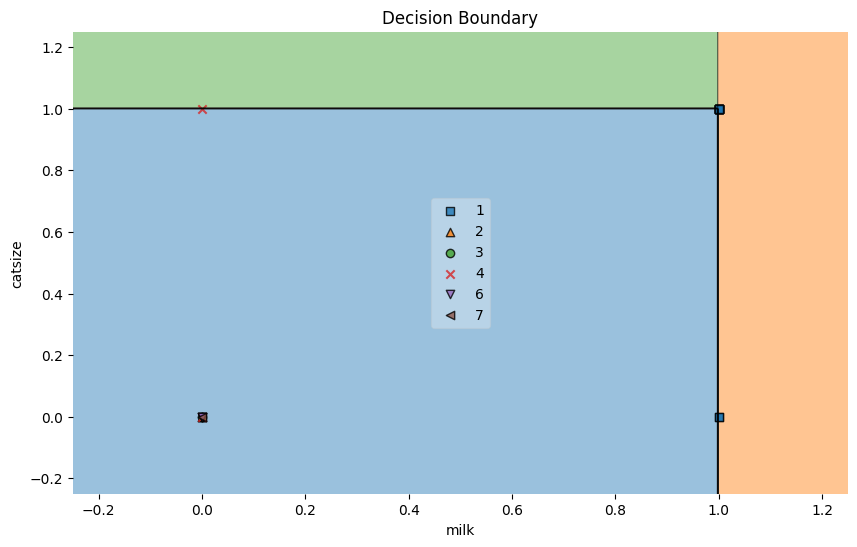

In [40]:
plt.figure(figsize = (10, 6))
plot_decision_regions(x_test[important_features.columns].values, y_test.values, clf = knn07_important, legend = 10)
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.xlabel('{}'.format(important_features.columns[0]))
plt.ylabel('{}'.format(important_features.columns[1]))
plt.title('Decision Boundary')
plt.show()

* These decision boundary plots visualize KNN classification using 2 binary features: milk and catsize, 16 features. Both features are binary (0 or 1), so the entire input space comprises four possible combinations: (0,0), (0,1), (1,0), (1,1).

* The model uses the Hamming distance metric, which is ideal for binary data as it measures the positional mismatch. The two plots differ in the number of neighbors:

    * K = 5: The decision regions at points (0,0) and (1,0), the marker shows two classes, meaning a transition and fragmented boundaries but the voting influence is more evenly distributed across 3 visible classes.

    * K = 7: Class 1 clearly dominates most of the decision space, especially around (0,0), (1,0), and (1,1), likely due to having more datapoints as 7 neighbors are considered.

* Only 3 of the 7 total classes (labels) are visible here. This is expected since the plot shows only a 2D slice of the 14D feature space. Instances of other classes might exist in regions shaped by other, unseen features.

* The sharp rectangular decision boundaries are a result:

  * Binary input space (discrete steps 0 and 1),

  * Use of Hamming distance, which doesn't consider magnitude but only positional mismatch.

* Marker positions reflect actual data points present in the dataset, and voting-based classification by KNN assigns nearby grid areas to the majority class among neighbors.